## Import all required tools

# Base without DAC

# All SSP no DAC

# All SSP with DAC

# Emissions

# Annual CO2 injection

# IAMC Reporting

**Plotting in Pyam**

-- SSP1 --


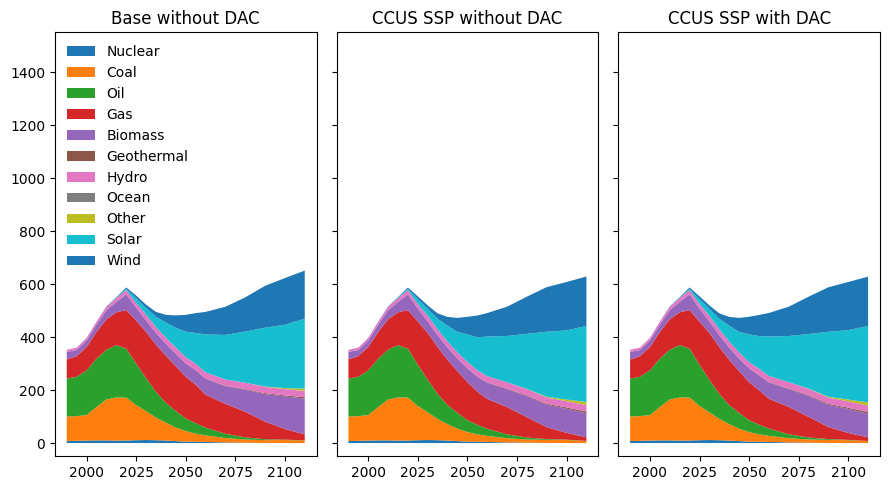

-- SSP2 --


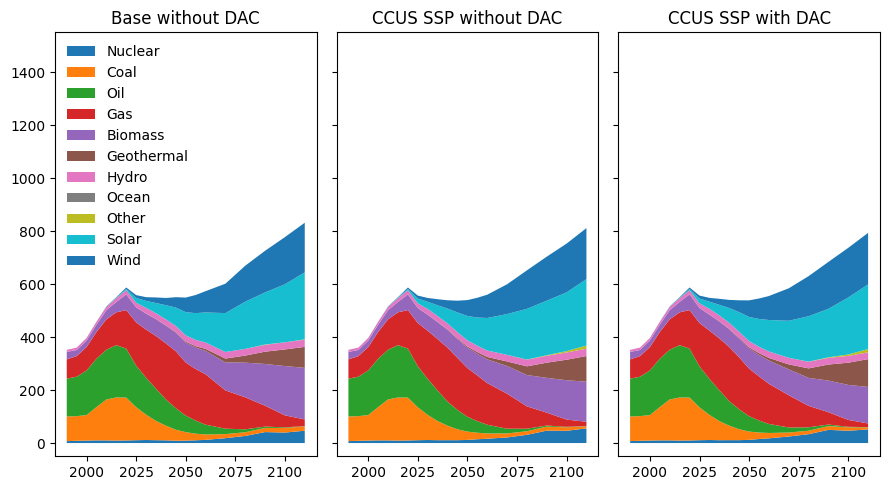

-- SSP5 --


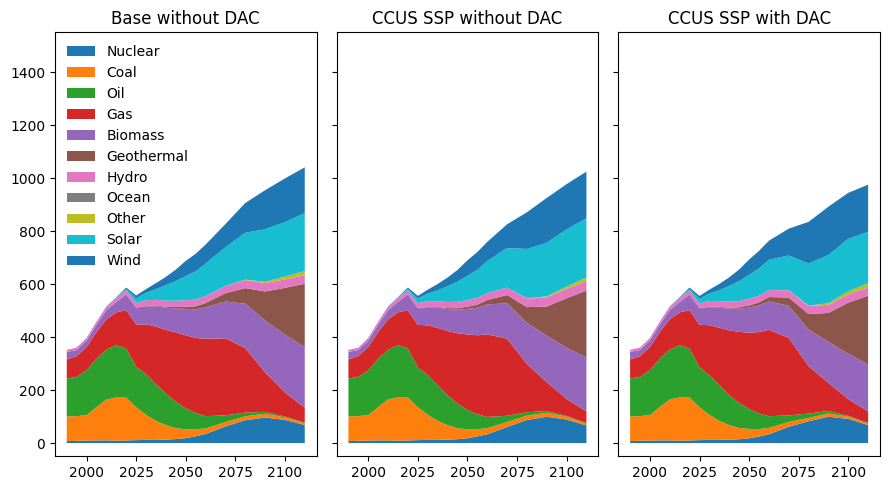

In [2]:
import numpy as np
import pandas as pd
import pyam
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

ssps = ["SSP1","SSP2","SSP5"]

setups = {'Base without DAC':'1000f_no-dac',
          'CCUS SSP without DAC':'1000f_all-ssp-param_no-dac',
          'CCUS SSP with DAC':'1000f_all-ssp-param'}

path = r'C:\Users\pratama\Documents\GitHub\MESSAGEix\message_data\reporting_output'

var_plot = ['Primary Energy|Nuclear',
            'Primary Energy|Coal',
            'Primary Energy|Oil',
            'Primary Energy|Gas',
            'Primary Energy|Biomass',
            'Primary Energy|Geothermal',
            'Primary Energy|Hydro',
            'Primary Energy|Ocean',
            'Primary Energy|Other',
            'Primary Energy|Solar',
            'Primary Energy|Wind']

for ssp in ssps:
    print('--',ssp,'--')
    fig, axs = plt.subplots(ncols=3, figsize=(9,5), sharex=True, sharey=True)
    count = 0
    for key,val in setups.items():
        fname = f'/SSP_dev_{ssp}_v0.1_materials-dac-co2split_'+f'{val}.xlsx'
        df = pd.read_excel(path+fname)
        df.fillna('Empty Data')
        df = pyam.IamDataFrame(data=df)
        data = df.filter(region='World', variable=var_plot)
        
        data_plot = {var: list(data.filter(variable=var).timeseries().iloc[0]) 
                     for var in var_plot}
        
        years = list(data.timeseries().columns)

        axs[count].stackplot(years,data_plot.values(),
                      labels=[label.replace('Primary Energy|', '') 
                              for label in list(data_plot.keys())]
                     )
        axs[count].set_title(key)
        count += 1
        
    axs[0].set_ylim(-50,1550)
    axs[0].legend(ncol=1, frameon=False, loc='upper left')
    
    plt.tight_layout()
    fig.savefig(f'Primary Energy {ssp} key.jpg', dpi=300)
    plt.show()

        

-- SSP1 --


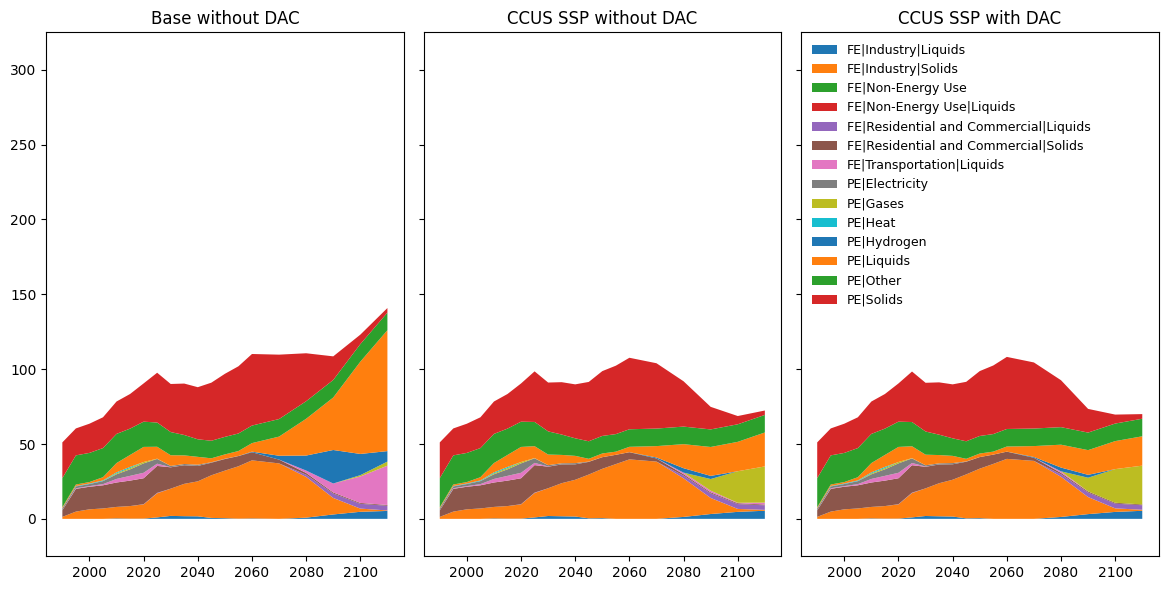

-- SSP2 --


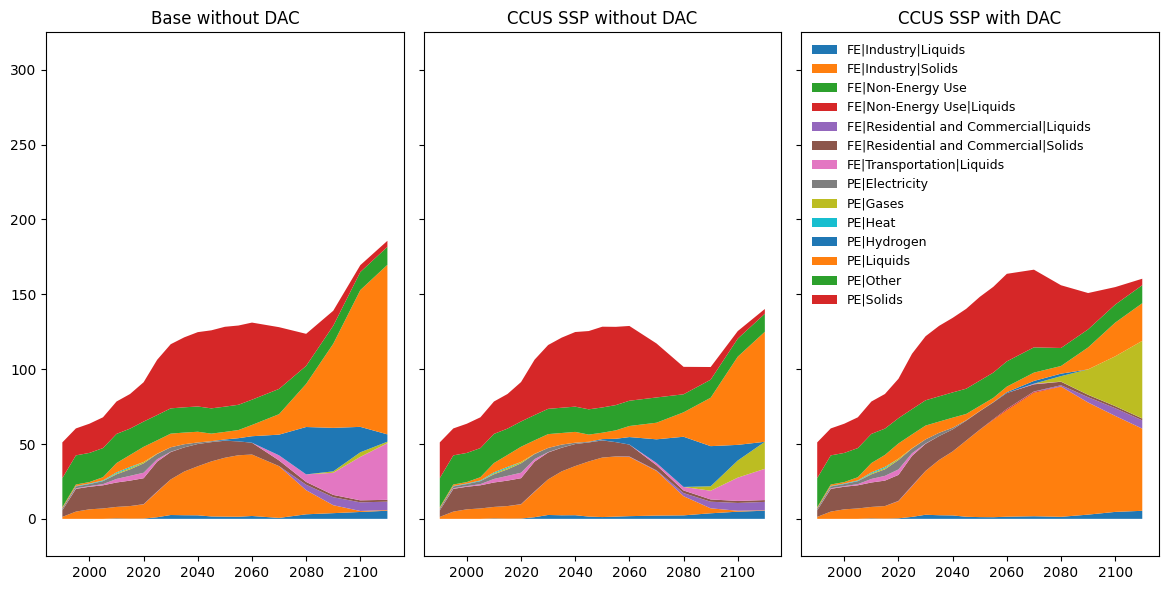

-- SSP5 --


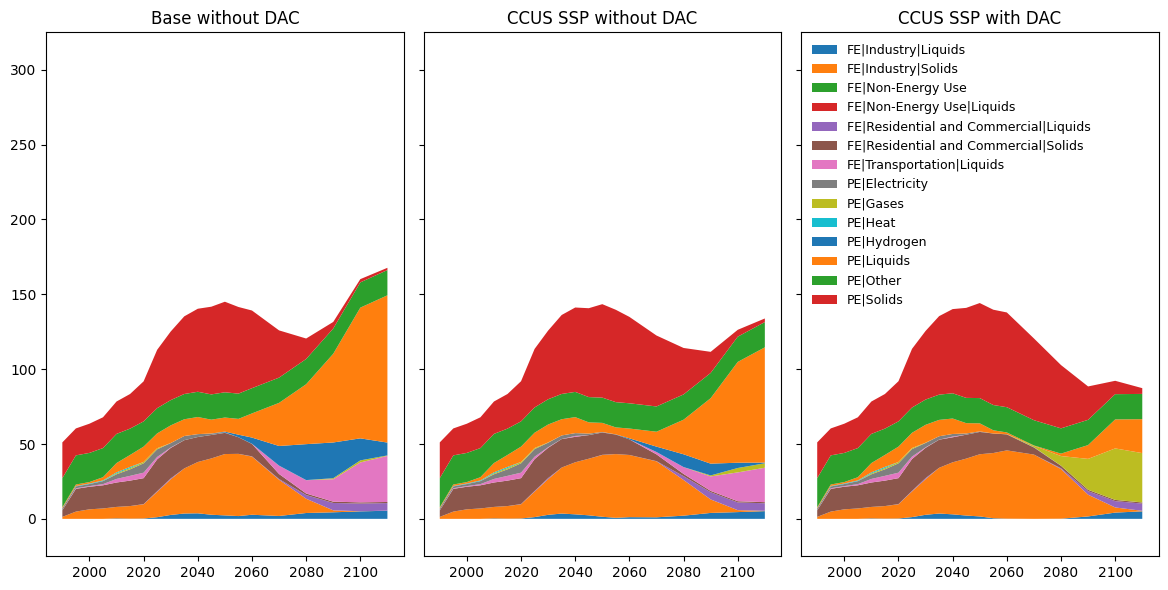

In [88]:
import numpy as np
import pandas as pd
import pyam
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

ssps = ["SSP1","SSP2","SSP5"]

setups = {'Base without DAC':'1000f_no-dac',
          'CCUS SSP without DAC':'1000f_all-ssp-param_no-dac',
          'CCUS SSP with DAC':'1000f_all-ssp-param'}

path = r'C:\Users\pratama\Documents\GitHub\MESSAGEix\message_data\reporting_output'

var_plot = [
    'Final Energy|Industry|Liquids|Biomass',
    'Final Energy|Industry|Solids|Biomass',
    'Final Energy|Non-Energy Use|Biomass',
    'Final Energy|Non-Energy Use|Liquids|Biomass',
    'Final Energy|Residential and Commercial|Liquids|Biomass',
    'Final Energy|Residential and Commercial|Solids|Biomass',
    'Final Energy|Transportation|Liquids|Biomass',
    'Primary Energy|Biomass|Electricity',
    'Primary Energy|Biomass|Gases',
    'Primary Energy|Biomass|Heat',
    'Primary Energy|Biomass|Hydrogen',
    'Primary Energy|Biomass|Liquids',
    'Primary Energy|Biomass|Other',
    'Primary Energy|Biomass|Solids',
    
]

for ssp in ssps:
#for ssp in ['SSP1']:
    print('--',ssp,'--')
    fig, axs = plt.subplots(ncols=3, figsize=(12,6), sharex=True, sharey=True)
    count = 0
    for key,val in setups.items():
        fname = f'/SSP_dev_{ssp}_v0.1_materials-dac-co2split_'+f'{val}.xlsx'
        df = pd.read_excel(path+fname)
        df.fillna('Empty Data')
        df = pyam.IamDataFrame(data=df)
        data = df.filter(region='World', variable=var_plot).timeseries().fillna(0)
        data = pyam.IamDataFrame(data=data)
        
        data_plot = {var: list(data.filter(variable=var).timeseries().iloc[0]) 
                     for var in var_plot}
        
        years = list(data.timeseries().columns)

        axs[count].stackplot(years,data_plot.values(),
                      labels=[label.replace('|Biomass', '').replace('Final Energy', 'FE').replace('Primary Energy', 'PE')
                              for label in list(data_plot.keys())]
                     )
        axs[count].set_title(key)
        count += 1
        
    axs[0].set_ylim(-25,325)
    axs[2].legend(ncol=1, frameon=False,loc='upper left', fontsize=9)
    
    plt.tight_layout()
    fig.savefig(f'Final Energy {ssp} biomass.jpg', dpi=300)
    plt.show()

        

# Biomass check

-- SSP1 --


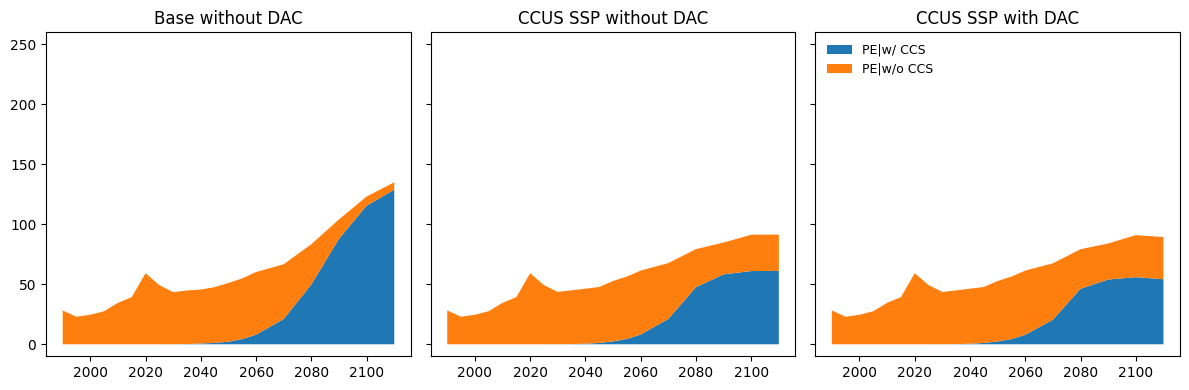

-- SSP2 --


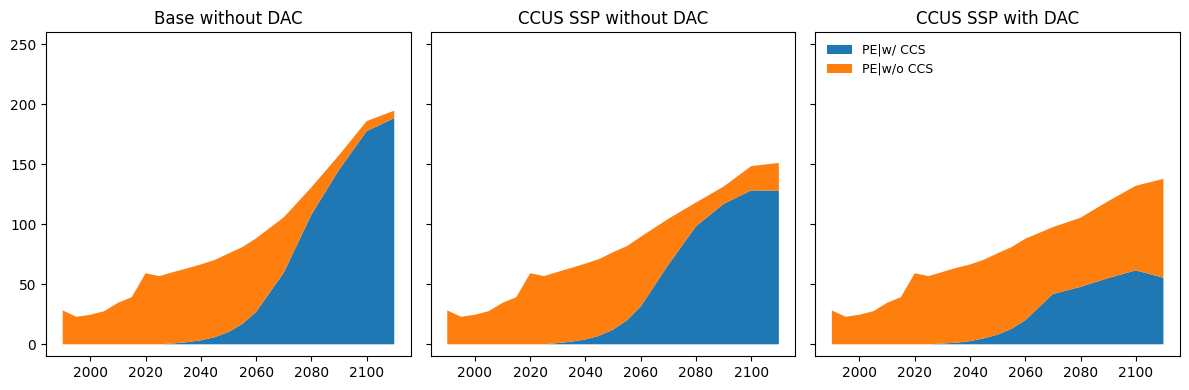

-- SSP5 --


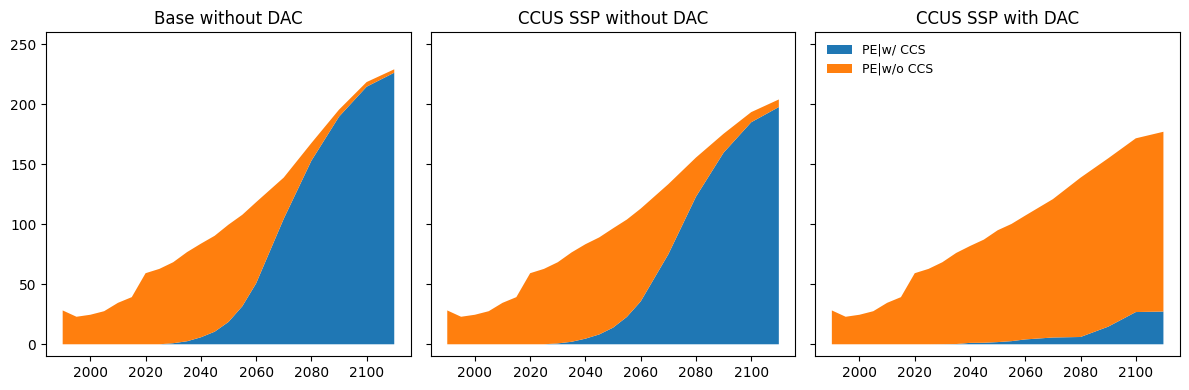

In [86]:
import numpy as np
import pandas as pd
import pyam
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

ssps = ["SSP1","SSP2","SSP5"]

setups = {'Base without DAC':'1000f_no-dac',
          'CCUS SSP without DAC':'1000f_all-ssp-param_no-dac',
          'CCUS SSP with DAC':'1000f_all-ssp-param'}

path = r'C:\Users\pratama\Documents\GitHub\MESSAGEix\message_data\reporting_output'

var_plot = [
    'Primary Energy|Biomass|w/ CCS',
    'Primary Energy|Biomass|w/o CCS',
]

for ssp in ssps:
#for ssp in ['SSP1']:
    print('--',ssp,'--')
    fig, axs = plt.subplots(ncols=3, figsize=(12,4), sharex=True, sharey=True)
    count = 0
    for key,val in setups.items():
        fname = f'/SSP_dev_{ssp}_v0.1_materials-dac-co2split_'+f'{val}.xlsx'
        df = pd.read_excel(path+fname)
        df.fillna('Empty Data')
        df = pyam.IamDataFrame(data=df)
        data = df.filter(region='World', variable=var_plot).timeseries().fillna(0)
        data = pyam.IamDataFrame(data=data)
        
        data_plot = {var: list(data.filter(variable=var).timeseries().iloc[0]) 
                     for var in var_plot}
        
        years = list(data.timeseries().columns)

        axs[count].stackplot(years,data_plot.values(),
                      labels=[label.replace('|Biomass', '').replace('Final Energy', 'FE').replace('Primary Energy', 'PE')
                              for label in list(data_plot.keys())]
                     )
        axs[count].set_title(key)
        count += 1
        
    axs[0].set_ylim(-10,260)
    axs[2].legend(ncol=1, frameon=False,loc='upper left', fontsize=9)
    
    plt.tight_layout()
    fig.savefig(f'Final Energy {ssp} biomass CCS.jpg', dpi=300)
    plt.show()

        

# Flow check

-- SSP1 --


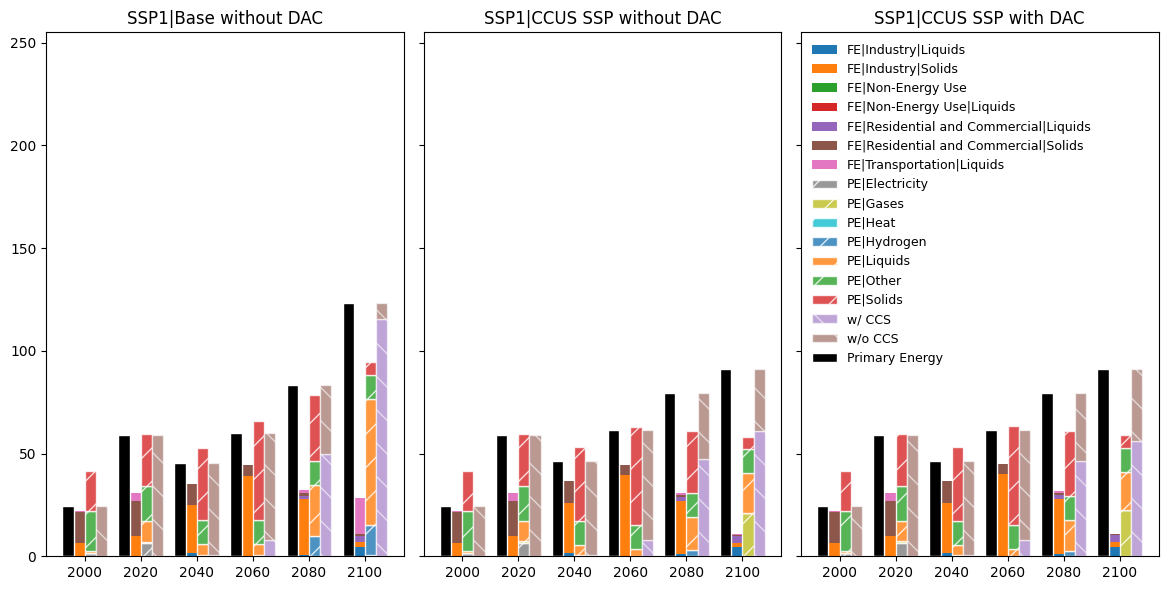

-- SSP2 --


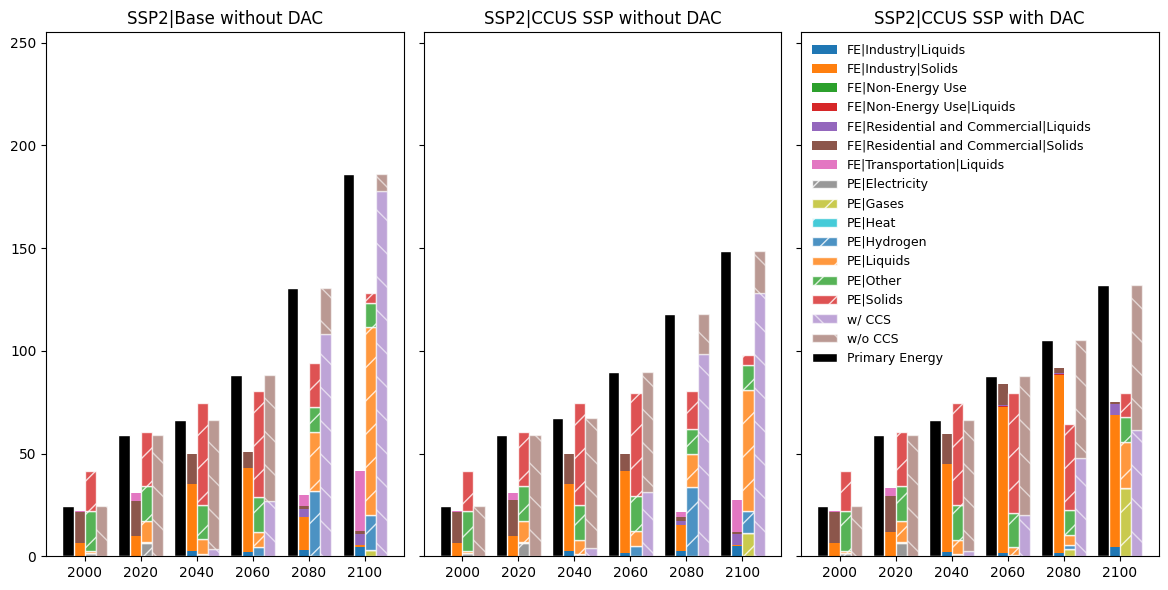

-- SSP5 --


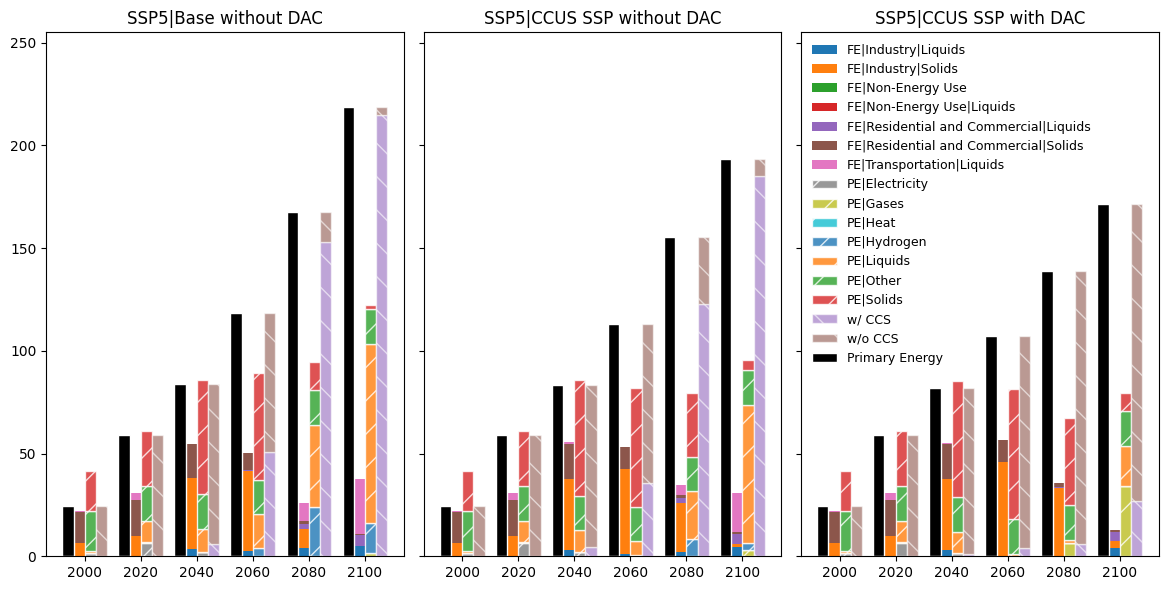

In [151]:
import numpy as np
import pandas as pd
import pyam
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

ssps = ["SSP1","SSP2","SSP5"]

setups = {'Base without DAC':'1000f_no-dac',
          'CCUS SSP without DAC':'1000f_all-ssp-param_no-dac',
          'CCUS SSP with DAC':'1000f_all-ssp-param'}

path = r'C:\Users\pratama\Documents\GitHub\MESSAGEix\message_data\reporting_output'

tot_plot = [
    'Primary Energy|Biomass',]


fe_plot = [
    'Final Energy|Industry|Liquids|Biomass',
    'Final Energy|Industry|Solids|Biomass',
    'Final Energy|Non-Energy Use|Biomass',
    'Final Energy|Non-Energy Use|Liquids|Biomass',
    'Final Energy|Residential and Commercial|Liquids|Biomass',
    'Final Energy|Residential and Commercial|Solids|Biomass',
    'Final Energy|Transportation|Liquids|Biomass',

]

pe_plot = [
    'Primary Energy|Biomass|Electricity',
    'Primary Energy|Biomass|Gases',
    'Primary Energy|Biomass|Heat',
    'Primary Energy|Biomass|Hydrogen',
    'Primary Energy|Biomass|Liquids',
    'Primary Energy|Biomass|Other',
    'Primary Energy|Biomass|Solids',
]

ccs_plot = [
    'Primary Energy|Biomass|w/ CCS',
    'Primary Energy|Biomass|w/o CCS',
]


years = [*range(2000,2110,20)]

for ssp in ssps:
#for ssp in ['SSP1']:
    print('--',ssp,'--')
    fig, axs = plt.subplots(ncols=3, figsize=(12,6), sharex=True, sharey=True)
    count = 0
    for key,val in setups.items():
        fname = f'/SSP_dev_{ssp}_v0.1_materials-dac-co2split_'+f'{val}.xlsx'
        #'''
        df = pd.read_excel(path+fname)
        df.fillna('Empty Data')
        df = pyam.IamDataFrame(data=df)
        
        tot_data = df.filter(region='World', year=years, variable=tot_plot).timeseries().fillna(0)
        tot_data = pyam.IamDataFrame(data=tot_data)
        
        
        fe_data = df.filter(region='World', year=years, variable=fe_plot).timeseries().fillna(0)
        fe_data = pyam.IamDataFrame(data=fe_data)
        
        pe_data = df.filter(region='World', year=years, variable=pe_plot).timeseries().fillna(0)
        pe_data = pyam.IamDataFrame(data=pe_data)
        
        ccs_data = df.filter(region='World', year=years, variable=ccs_plot).timeseries().fillna(0)
        ccs_data = pyam.IamDataFrame(data=ccs_data)
        
        
        tot_data_plot = list(tot_data.timeseries().iloc[0])
                
        fe_data_plot = {var: list(fe_data.filter(variable=var).timeseries().iloc[0]) 
                     for var in fe_plot}
        
        pe_data_plot = {var: list(pe_data.filter(variable=var).timeseries().iloc[0]) 
                     for var in pe_plot}
        
        ccs_data_plot = {var: list(ccs_data.filter(variable=var).timeseries().iloc[0]) 
                     for var in ccs_plot}
        #'''
        
        bottom = np.zeros(len(years))
        for k, v in fe_data_plot.items():
            axs[count].bar([year - 2 for year in years],v,bottom=bottom, width=4,
                           label=k.replace('|Biomass', '').replace('Final Energy', 'FE')
                         )
            bottom += v
        
        bottom = np.zeros(len(years))
        for k, v in pe_data_plot.items():
            axs[count].bar([year + 2 for year in years],v,bottom=bottom, width=4, 
                           hatch='/', edgecolor= 'white', alpha=0.8,
                           label=k.replace('|Biomass', '').replace('Primary Energy', 'PE')
                         )
            bottom += v

        bottom = np.zeros(len(years))
        for k, v in ccs_data_plot.items():
            axs[count].bar([year + 6 for year in years],v,bottom=bottom, width=4, 
                           hatch='\\', edgecolor= 'white', alpha=0.6,
                           label=k.replace('|Biomass', '').replace('Primary Energy|', '')
                         )
            bottom += v
        
        axs[count].bar([year - 6 for year in years],tot_data_plot, width=4, 
                       edgecolor= 'white', color='black',label='Primary Energy')
        
        axs[count].set_title(ssp+'|'+key)
        count += 1
        
    axs[0].set_ylim(0,255)
    axs[2].legend(ncol=1, frameon=False,loc='upper left', fontsize=9)
    
    plt.tight_layout()
    fig.savefig(f'Final Energy {ssp} biomass.jpg', dpi=300)
    plt.show()

        